# Projet 2 : Concevez une application au service de la santé publique

## Mission 1 : Traitement du jeu de données

In [1]:
# importation des librairies

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno


### Les données

### Objectifs

### Mission 1 : Traitement du jeu de données

In [2]:
# chargement du fichier

food_data = pd.read_csv('C:\\Users\\mfila\\open_food.csv',sep = "\t",header=0,low_memory=False)

In [3]:
# premières lignes du dataframe

food_data.iloc[0:5]

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# dimensions du dataframe

food_data.shape

(320772, 162)

In [5]:
# description du dataframe

food_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB


In [6]:
# nom des colonnes par types de variables 

food_data.columns.to_series().groupby(food_data.dtypes).groups

{float64: ['no_nutriments', 'additives_n', 'ingredients_from_palm_oil_n', 'ingredients_from_palm_oil', 'ingredients_that_may_be_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil', 'nutrition_grade_uk', 'energy_100g', 'energy-from-fat_100g', 'fat_100g', 'saturated-fat_100g', 'butyric-acid_100g', 'caproic-acid_100g', 'caprylic-acid_100g', 'capric-acid_100g', 'lauric-acid_100g', 'myristic-acid_100g', 'palmitic-acid_100g', 'stearic-acid_100g', 'arachidic-acid_100g', 'behenic-acid_100g', 'lignoceric-acid_100g', 'cerotic-acid_100g', 'montanic-acid_100g', 'melissic-acid_100g', 'monounsaturated-fat_100g', 'polyunsaturated-fat_100g', 'omega-3-fat_100g', 'alpha-linolenic-acid_100g', 'eicosapentaenoic-acid_100g', 'docosahexaenoic-acid_100g', 'omega-6-fat_100g', 'linoleic-acid_100g', 'arachidonic-acid_100g', 'gamma-linolenic-acid_100g', 'dihomo-gamma-linolenic-acid_100g', 'omega-9-fat_100g', 'oleic-acid_100g', 'elaidic-acid_100g', 'gondoic-acid_100g', 'mead-acid_100g', 'erucic-acid_100g', '

In [7]:
# supprimer les colonnes inutiles

data = food_data.copy()
columns_to_drop = ['url','creator', 'created_t', 'created_datetime','last_modified_t', 'last_modified_datetime']
data.drop(columns_to_drop, inplace=True, axis=1)

In [8]:
# recherche des doublons par le code de produit

data.loc[data['code'].duplicated(keep=False),:]

,code,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
189068,NaN,"Belgique,France","Lait entier, fruits : fraise (20 %), mangue (1...",NaN,NaN,NaN,NaN,NaN,125 g (1 pot),NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189103,NaN,France,"_Lait_ entier (59,5 %), _lait_ écrémé concentr...","Lait, lait, crème",NaN,NaN,NaN,NaN,125 g (1 pot),NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189109,NaN,"Belgique,France,Suisse","Lait entier 69.5 %, fruits : fraise 10 %, mang...",NaN,NaN,NaN,NaN,NaN,125 g (1 pot),NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189119,NaN,France,"_Lait_ entier (78%), fruits : mangue, abricot...",Lait,NaN,NaN,NaN,NaN,125 g,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189152,NaN,France,"_Lait_ écrémé, _lait_ écrémé concentré ou en p...","Lait, lait",NaN,NaN,NaN,NaN,16 pots de 125 g,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189160,NaN,France,"_Lait_ écrémé, fruits : fraise (12 %), cerise ...","Lait, lait",NaN,NaN,NaN,NaN,125 g (1 pot),NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189162,NaN,France,"_Lait_ écrémé, _lait_ écrémé concentré ou en p...","Lait, lait, lait, lait, lait",NaN,NaN,NaN,NaN,125 g,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189168,NaN,France,"_Lait_ entier (59,5 %), _lait_ écrémé concentr...","Lait, lait, crème, lactiques",NaN,NaN,NaN,NaN,125 g,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189242,NaN,France,"_Lait_ entier, rhubarbe (8 %), sucre (8 %), la...","Lait, lait, lait",NaN,NaN,NaN,NaN,125 g (1 pot),NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189244,NaN,France,"_Lait_ entier, ananas (8 %), sucre (7,1 %), _l...","Lait, lait, lait, lait",NaN,NaN,NaN,NaN,125 g (1 pot),NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# choix des colonnes à garder

col_to_keep = ['code','product_name','generic_name', 'categories', 'categories_tags', 
                               'categories_fr','nutrition_grade_fr', 'pnns_groups_1', 'pnns_groups_2', 
                               'main_category','main_category_fr', 'labels_fr','nutrition_grade_fr', 'nutrition-score-fr_100g',
                               'energy_100g','saturated-fat_100g','fat_100g','sugars_100g','salt_100g','proteins_100g','fiber_100g',
                               'fruits-vegetables-nuts-estimate_100g', 'fruits-vegetables-nuts_100g',
                               'fruits-vegetables-nuts-dried_100g']

In [10]:
# verification des lignes contenantes les NaN seulement

data.isnull().all(axis=1).unique()

array([False])

In [11]:
# fonction pour visualiser le remplissage pour chaque variable

def remplissage_plot(df) :
    plt.figure(figsize = (25,10))
    sns.heatmap(df.isna(), cmap = "Blues_r")

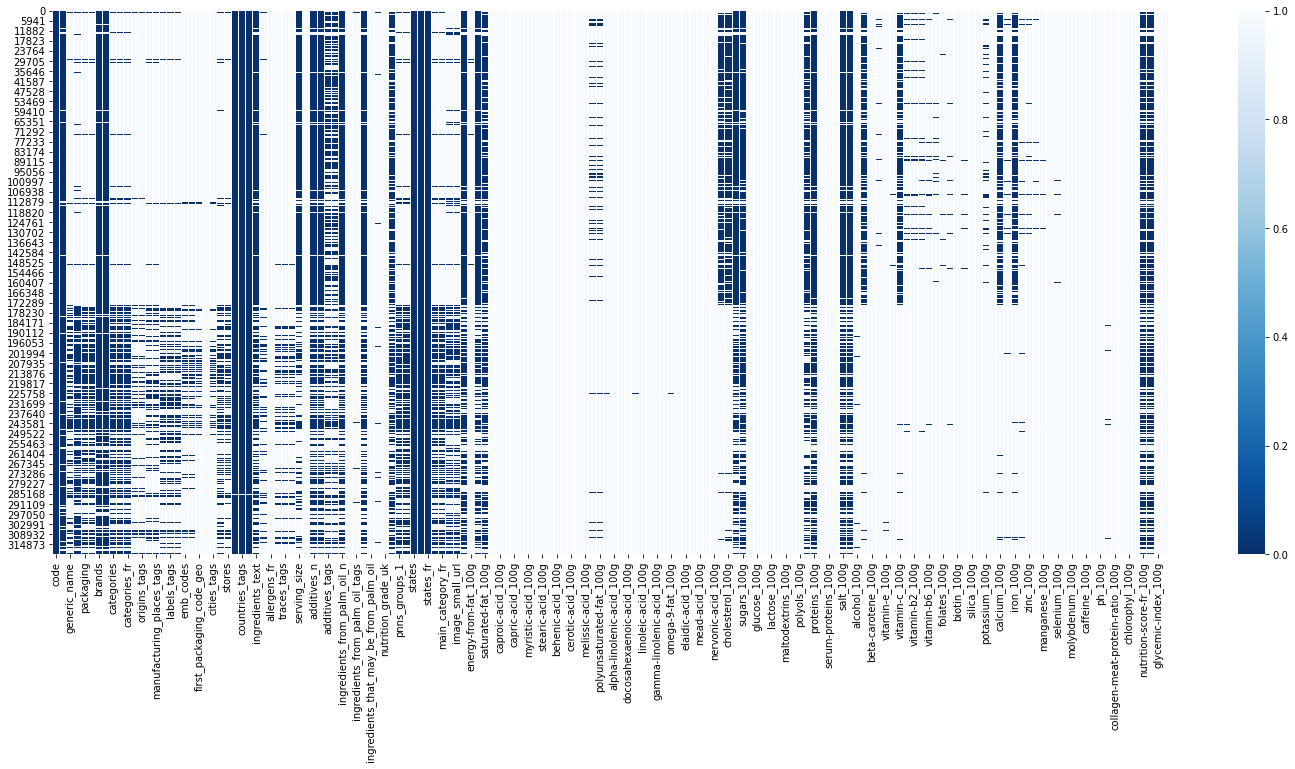

In [12]:
# visualisation du remplissage pour chaque variable

remplissage_plot(data)

In [13]:
# Fonction pour calculer le nombre et le pourcentage des données manquantes dans chaque colonne

def taux_remplissage(df):
    valeurs_manquantes=df.isnull().sum().sort_values()
    pourcentage=100 * valeurs_manquantes / len(df)
    df_null = pd.concat([valeurs_manquantes, pourcentage.round(2)], axis=1)
    df_null.columns = ['Nombre_valeurs_manquantes', 'Pourcentage_valeurs_manquantes']
    return(df_null)


In [14]:
df_null = taux_remplissage(data)

In [15]:
# Nombre de colonnes avec plus de 50% de valeurs manquantes

df_null.loc[df_null['Pourcentage_valeurs_manquantes'] > 50]


,Nombre_valeurs_manquantes,Pourcentage_valeurs_manquantes
additives_fr,166092,51.78
additives_tags,166092,51.78
cholesterol_100g,176682,55.08
trans-fat_100g,177474,55.33
calcium_100g,179722,56.03
...,...,...
glycemic-index_100g,320772,100.00
elaidic-acid_100g,320772,100.00
mead-acid_100g,320772,100.00
ingredients_that_may_be_from_palm_oil,320772,100.00


In [16]:
# nous cherchons les differents modes d'ecriture du pays France 

data['countries'].unique().tolist()

['en:FR',
 'US',
 'France',
 'en:GB',
 'France, US',
 'Canada',
 'United Kingdom',
 'en:CH',
 'en:ES',
 'Deutschland',
 'en:SI',
 'en:DE',
 'en:IT',
 'en:RO',
 'España',
 'en:AU',
 'en:PT',
 'United States',
 'Germany',
 'Usa',
 'France,Royaume-Uni',
 'UK,France',
 'France,Belgique,Pays-Bas,Royaume-Uni',
 'France,United Kingdom',
 'en:GP',
 'France,UK',
 'États-Unis',
 'Royaume-Uni,France',
 'en:CA',
 nan,
 'en:US,United Kingdom',
 'Switzerland',
 'en:US',
 'en:CA, US',
 'Nederland',
 'en:AU, en:france',
 'Australia',
 'France,Suisse,États-Unis,Canada',
 'États-Unis, en:france, US',
 'Ireland',
 'United Kingdom, US',
 'en:RE, en:france',
 'United States, en:france',
 'en:TW',
 'en:AU, Suisse',
 'Deutschland, en:france',
 'Suisse',
 'en:BR',
 'Belgique,France',
 'en:DO',
 'en:FR, US',
 'Belgique,France,Pays-Bas,Royaume-Uni',
 'France,United States',
 'Australie, US',
 'USA',
 'en:SA',
 'Saudi Arabia',
 'en:AE',
 'en:IQ',
 'en:KW',
 'Republica Moldova',
 'Belgium',
 'en:NC',
 'Singapore'

In [17]:
# saufgarder les codes pays France dans une liste

list_france = ["FR", "fr", "Fr"]

# creation d'un nouveau dataframe pour les produits disponibles sur le marché français 

data_france = data[data['countries'].str.contains("|".join(list_france)) == True]

In [18]:
data_france.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98468 entries, 0 to 320770
Columns: 156 entries, code to water-hardness_100g
dtypes: float64(106), object(50)
memory usage: 117.9+ MB


In [19]:
df_null_france = taux_remplissage(data_france)

In [20]:
# variables avec plus de 50% des données absentes 

df_null_france_50 = df_null_france.loc[df_null_france['Pourcentage_valeurs_manquantes'] > 50].T

In [21]:
df_null_france_50

,fat_100g,carbohydrates_100g,fiber_100g,purchase_places,generic_name,stores,labels_tags,labels_fr,labels,additives_tags,...,lignoceric-acid_100g,stearic-acid_100g,palmitic-acid_100g,melissic-acid_100g,capric-acid_100g,caprylic-acid_100g,caproic-acid_100g,butyric-acid_100g,behenic-acid_100g,water-hardness_100g
Nombre_valeurs_manquantes,50791.00,51223.00,52721.00,55085.00,60149.00,60405.00,63328.00,63328.00,63366.00,67995.00,...,98468.0,98468.0,98468.0,98468.0,98468.0,98468.0,98468.0,98468.0,98468.0,98468.0
Pourcentage_valeurs_manquantes,51.58,52.02,53.54,55.94,61.08,61.34,64.31,64.31,64.35,69.05,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


In [22]:
# recuperation des noms des colonnes à supprimer

col_to_drop = df_null_france.loc[df_null_france['Pourcentage_valeurs_manquantes'] > 50].T.columns

In [23]:
col_to_drop

Index(['fat_100g', 'carbohydrates_100g', 'fiber_100g', 'purchase_places',
       'generic_name', 'stores', 'labels_tags', 'labels_fr', 'labels',
       'additives_tags',
       ...
       'lignoceric-acid_100g', 'stearic-acid_100g', 'palmitic-acid_100g',
       'melissic-acid_100g', 'capric-acid_100g', 'caprylic-acid_100g',
       'caproic-acid_100g', 'butyric-acid_100g', 'behenic-acid_100g',
       'water-hardness_100g'],
      dtype='object', length=120)

In [24]:
# liste finale des colonnes à supprimer, les variables importantes exclues

col_to_drop_fin = list(set(col_to_drop) - set(col_to_keep))

In [25]:
col_to_drop_fin

['caproic-acid_100g',
 'purchase_places',
 'linoleic-acid_100g',
 'palmitic-acid_100g',
 'manufacturing_places',
 'cholesterol_100g',
 'cocoa_100g',
 'phosphorus_100g',
 'gondoic-acid_100g',
 'ingredients_from_palm_oil_tags',
 'additives_fr',
 'vitamin-a_100g',
 'mead-acid_100g',
 'labels_tags',
 'arachidic-acid_100g',
 'casein_100g',
 'vitamin-pp_100g',
 'vitamin-b2_100g',
 'erucic-acid_100g',
 'maltose_100g',
 'ingredients_from_palm_oil',
 'origins',
 'manganese_100g',
 'dihomo-gamma-linolenic-acid_100g',
 'lignoceric-acid_100g',
 'serving_size',
 'vitamin-b9_100g',
 'omega-6-fat_100g',
 'carbon-footprint_100g',
 'alpha-linolenic-acid_100g',
 'pantothenic-acid_100g',
 'emb_codes',
 'potassium_100g',
 'nucleotides_100g',
 'arachidonic-acid_100g',
 'stores',
 'stearic-acid_100g',
 'copper_100g',
 'oleic-acid_100g',
 'labels',
 'manufacturing_places_tags',
 'capric-acid_100g',
 'nutrition_grade_uk',
 'molybdenum_100g',
 'nervonic-acid_100g',
 'folates_100g',
 'carbohydrates_100g',
 'ori

In [26]:
data_france_clean=data_france.copy()

In [27]:
# supprimer les colonnes peu remplies (moins 50 %)

data_france_clean.drop(col_to_drop_fin, inplace=True, axis=1)


In [28]:
# supprimer les colonnes inutiles

columns_to_drop2 = ['brands_tags','nutrition-score-uk_100g', 
                    'countries', 'countries_tags', 'countries_fr','ingredients_text',
        'additives_n', 'additives',
       'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n','states', 'states_tags', 'states_fr']
data_france_clean.drop(columns_to_drop2, inplace=True, axis=1)

In [29]:
data_france_clean.columns

Index(['code', 'product_name', 'generic_name', 'quantity', 'packaging',
       'packaging_tags', 'brands', 'categories', 'categories_tags',
       'categories_fr', 'labels_fr', 'nutrition_grade_fr', 'pnns_groups_1',
       'pnns_groups_2', 'main_category', 'main_category_fr', 'image_url',
       'image_small_url', 'energy_100g', 'fat_100g', 'saturated-fat_100g',
       'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
       'sodium_100g', 'fruits-vegetables-nuts_100g',
       'nutrition-score-fr_100g'],
      dtype='object')

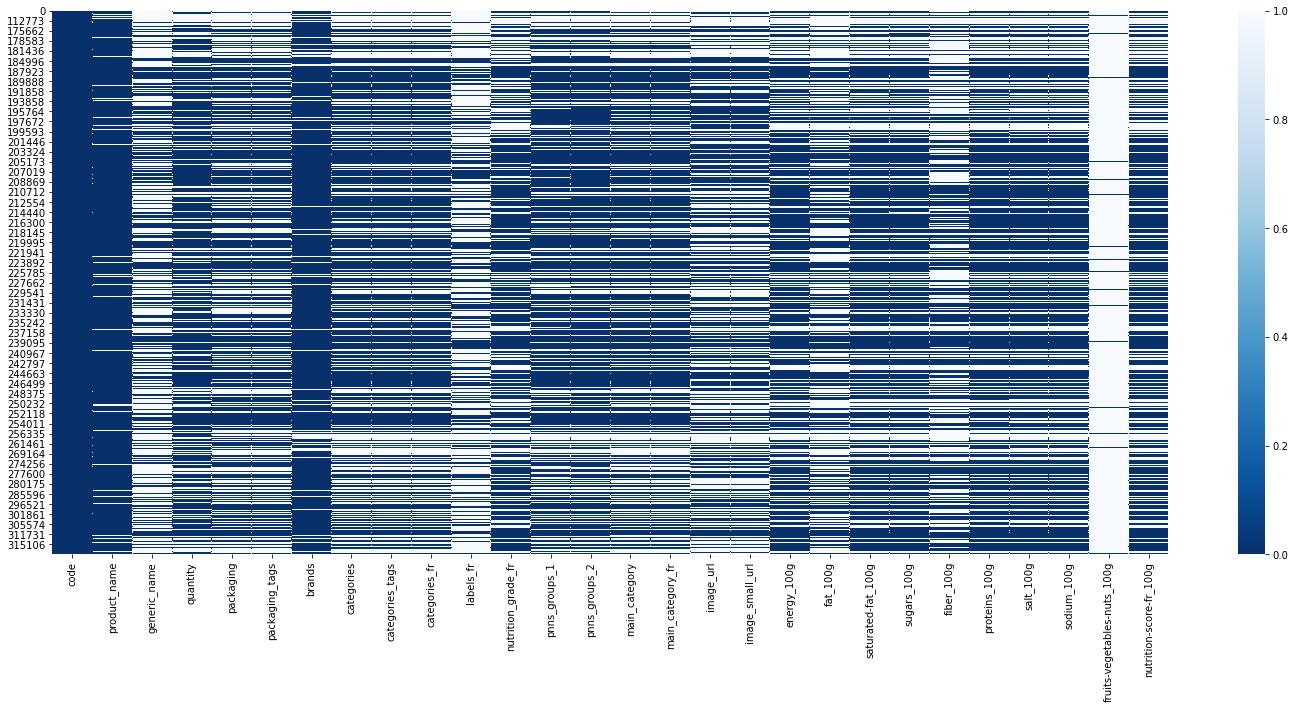

In [30]:
remplissage_plot(data_france_clean)

### Traitement des valeurs aberrantes

In [31]:
# types de variables de dataframe 

data_france_clean.columns.to_series().groupby(data_france_clean.dtypes).groups

{float64: ['energy_100g', 'fat_100g', 'saturated-fat_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g', 'fruits-vegetables-nuts_100g', 'nutrition-score-fr_100g'], object: ['code', 'product_name', 'generic_name', 'quantity', 'packaging', 'packaging_tags', 'brands', 'categories', 'categories_tags', 'categories_fr', 'labels_fr', 'nutrition_grade_fr', 'pnns_groups_1', 'pnns_groups_2', 'main_category', 'main_category_fr', 'image_url', 'image_small_url']}

In [32]:
# variables numeriques

var_num = ['energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 
           'proteins_100g', 'salt_100g', 'sodium_100g', 'fruits-vegetables-nuts_100g', 'nutrition-score-fr_100g']

In [33]:
# variables categorielles

var_cat = ['code', 'product_name', 'generic_name', 'brands', 'categories', 'categories_tags', 'categories_fr', 'labels_fr', 
           'nutrition_grade_fr', 'pnns_groups_1', 'pnns_groups_2', 'main_category', 'main_category_fr']

In [34]:
# verification des min, max pour les variables numeriques

data_france_clean.describe()

,energy_100g,fat_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,fruits-vegetables-nuts_100g,nutrition-score-fr_100g
count,6.462700e+04,47677.000000,62412.000000,62555.000000,45747.000000,64354.000000,62613.000000,62610.000000,2970.000000,61451.000000
mean,1.171628e+03,13.340016,5.426280,13.431192,2.559144,7.754553,1.160270,0.456820,31.555444,8.684757
std,1.283255e+04,16.939263,8.536277,19.087523,4.633990,7.887170,4.308534,1.696255,32.056998,9.046268
min,0.000000e+00,0.000000,0.000000,-0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000
25%,4.270000e+02,1.300000,0.300000,1.000000,0.000000,1.800000,0.080000,0.031496,0.000000,1.000000
50%,1.035000e+03,6.800000,2.000000,4.100000,1.390000,6.000000,0.558800,0.220000,24.000000,9.000000
75%,1.649000e+03,21.000000,7.400000,17.800000,3.200000,11.000000,1.244600,0.490000,51.000000,15.000000
max,3.251373e+06,380.000000,210.000000,105.000000,178.000000,100.000000,211.000000,83.000000,100.000000,40.000000


In [35]:
df1 = data_france_clean.copy()

In [36]:
# colonnes des varaibles quantitatives

cols = ['fat_100g',
      'saturated-fat_100g',
      'carbohydrates_100g',
      'sugars_100g',
      'fiber_100g',
      'proteins_100g',
      'salt_100g',
      'sodium_100g',
      'fruits-vegetables-nuts_100g']

In [37]:
# fonction pour remplacer les valeurs aberrantes hors min et max possibles pour les variables quantitatives

def remplacer_aberrantes(df):
    i=0
    for col in df.columns.to_list():
        if df[col].dtypes== 'float64':
            if col=='nutrition-score-fr_100g':
                df.loc[ (df1[col] > 40) | (df[col] < -15) , col] = np.NaN
                i=i+1
            elif col == 'energy_100g':
                df.loc[ (df[col] > 3700) | (df[col] < 0) , col] = np.NaN
                i=i+1
            else :
                df.loc[ (df[col] > 100) | (df[col] < 0) , col] = np.NaN
                i=i+1
    print(i)            
    return df   

In [38]:
df2 = data_france_clean.copy()

In [39]:
remplacer_aberrantes(df2)

10


,code,product_name,generic_name,quantity,packaging,packaging_tags,brands,categories,categories_tags,categories_fr,...,energy_100g,fat_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,fruits-vegetables-nuts_100g,nutrition-score-fr_100g
0,0000000003087,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,0000000024600,Filet de bœuf,NaN,2.46 kg,plastique,plastique,NaN,Filet de bœuf,fr:filet-de-boeuf,Filet-de-boeuf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,0000000027205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,0000000036252,Lion Peanut x2,NaN,NaN,NaN,NaN,Sunridge,NaN,NaN,NaN,...,1883.0,20.0,12.5,57.5,2.5,2.5,0.09652,0.038,NaN,22.0
136,0000000039259,Twix x2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320761,9906410000009,Roussette du Bugey (2011),Vins blanc du Bugey,750 ml,Bouteille en verre,bouteille-en-verre,Roussette du Bugey,"Boissons,Boissons alcoolisées,Vins,Vins blancs...","en:beverages,en:alcoholic-beverages,en:wines,e...","Boissons,Boissons alcoolisées,Vins,Vins frança...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320763,99111250,Thé vert Earl grey,thé bio équitable,50 g,"boîte,carton","boite,carton",Lobodis,thés verts,"en:plant-based-foods-and-beverages,en:beverage...","Aliments et boissons à base de végétaux,Boisso...",...,21.0,0.2,0.2,0.5,0.2,0.5,0.02540,0.010,NaN,2.0
320764,9918,"Cheese cake thé vert, yuzu",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320765,9935010000003,Rillette d'oie,NaN,180 g,"Pot,Verre","pot,verre","Sans marque,D.Lambert","Viandes,Produits à tartiner,Charcuteries,Produ...","en:meats,en:spreads,en:prepared-meats,en:salte...","Viandes,Produits à tartiner,Charcuteries,Produ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
# verification des max et min après le traitement

df2.describe()

,energy_100g,fat_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,fruits-vegetables-nuts_100g,nutrition-score-fr_100g
count,64369.000000,47675.000000,62411.000000,62550.000000,45746.000000,64354.000000,62611.000000,62610.000000,2970.000000,61451.000000
mean,1104.721428,13.330403,5.423003,13.425660,2.555309,7.754553,1.154941,0.456820,31.555444,8.684757
std,762.599540,16.850946,8.496977,19.074664,4.560863,7.887170,4.197117,1.696255,32.056998,9.046268
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000
25%,425.000000,1.300000,0.300000,1.000000,0.000000,1.800000,0.080000,0.031496,0.000000,1.000000
50%,1031.000000,6.800000,2.000000,4.045000,1.385000,6.000000,0.558800,0.220000,24.000000,9.000000
75%,1643.000000,21.000000,7.400000,17.800000,3.200000,11.000000,1.244600,0.490000,51.000000,15.000000
max,3700.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,83.000000,100.000000,40.000000


In [41]:
# dataframe avec les variables numeriques

df2_num=df2.select_dtypes(include=[np.number])

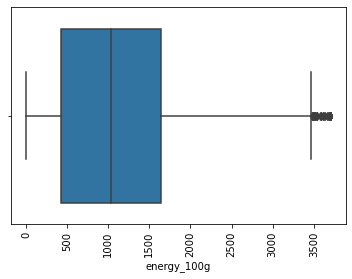

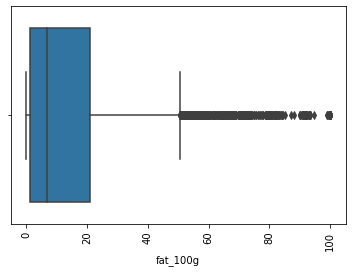

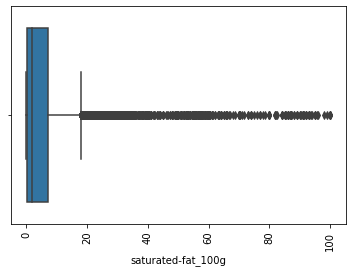

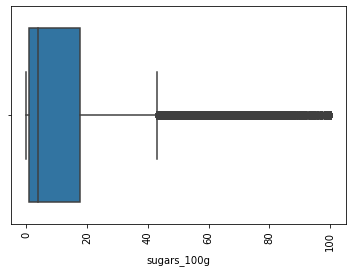

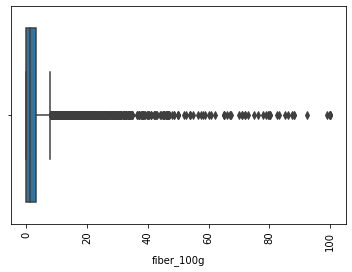

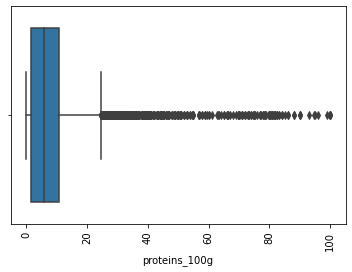

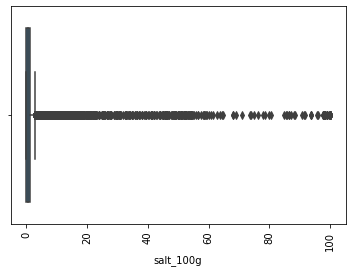

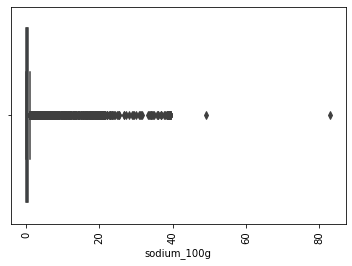

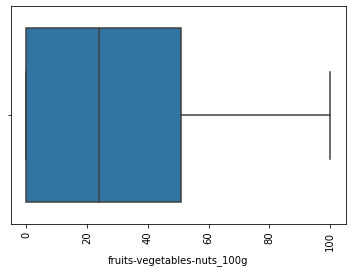

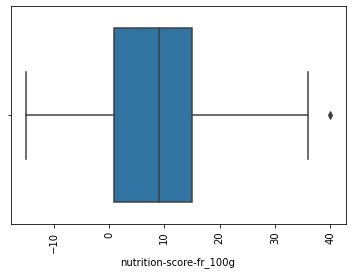

In [42]:
# Visualisation of outliers

for cols in df2_num.columns: 
    sns.boxplot(data = df2_num.loc[:,df2_num.columns.values], x = cols)
    plt.xticks(rotation = 90)
    plt.show()

In [43]:
# zoom sur les valeurs atypiques de la varible energy

df2.loc[df2.energy_100g > 3500].sample(10)

,code,product_name,generic_name,quantity,packaging,packaging_tags,brands,categories,categories_tags,categories_fr,...,energy_100g,fat_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,fruits-vegetables-nuts_100g,nutrition-score-fr_100g
278873,5411156002384,Balade So light,NaN,250 g,barquette,barquette,Balade,NaN,NaN,NaN,...,3699.0,NaN,12.7,2.5,0.0,0.3,0.50,0.196850,NaN,22.0
246255,3596710375547,Mélange de 4 huiles vierges végétales,Mélange de 4 huiles vierges végétales,75 cl,"Bouteille,Verre","bouteille,verre",Auchan,"Huiles,Huiles de tournesol","en:plant-based-foods-and-beverages,en:plant-ba...","Aliments et boissons à base de végétaux,Alimen...",...,3700.0,100.0,11.0,0.0,0.0,0.0,0.00,0.000000,NaN,11.0
115021,03277924,Huile d'Olive Vierge Extra Classico,NaN,75 cl,Bouteille,bouteille,Monini,"Aliments et boissons à base de végétaux,Alimen...","en:plant-based-foods-and-beverages,en:plant-ba...","Aliments et boissons à base de végétaux,Alimen...",...,3700.0,100.0,15.0,0.0,0.0,0.0,0.00,0.000000,NaN,11.0
255263,3770001564241,Huile de Noix Traditionnelle Vierge,NaN,5 cl,"Flacon,Verre","flacon,verre",Noix & Compagnie,"Aliments et boissons à base de végétaux,Alimen...","en:plant-based-foods-and-beverages,en:plant-ba...","Aliments et boissons à base de végétaux,Alimen...",...,3700.0,100.0,9.8,0.0,NaN,0.0,0.00,0.000000,NaN,10.0
207648,3250392066529,Huile d'olive vierge extra,Huile d'olive vierge extra,1 L,"Bouteille,Verre","bouteille,verre",Bouton d'Or,"Aliments et boissons à base de végétaux,Alimen...","en:plant-based-foods-and-beverages,en:plant-ba...","Aliments et boissons à base de végétaux,Alimen...",...,3700.0,100.0,14.3,0.5,0.0,0.5,0.01,0.003937,NaN,11.0
278557,5410556202547,Huile de Tournesol,Huile de tournesol,1 L,"Bouteille,Plastique 1 (PET),Bouchon,Plastique","bouteille,plastique-1-pet,bouchon,plastique","Sans marque,Jyco","Aliments et boissons à base de végétaux,Alimen...","en:plant-based-foods-and-beverages,en:plant-ba...","Aliments et boissons à base de végétaux,Alimen...",...,3700.0,100.0,11.0,0.0,0.0,0.0,0.00,0.000000,NaN,11.0
212339,3257980577016,Huile d'olive de Nyons AOP,Huile d'olive,50 cl,"Bouteille,Verre","bouteille,verre",Patrimoine gourmand,Huiles d'olive vierges extra,"en:plant-based-foods-and-beverages,en:plant-ba...","Aliments et boissons à base de végétaux,Alimen...",...,3700.0,100.0,12.0,0.0,0.0,0.0,0.00,0.000000,NaN,11.0
203385,3245270000504,Huile de noisette,NaN,250ml,Acier,acier,La Tourangelle,"Aliments et boissons à base de végétaux,Alimen...","en:plant-based-foods-and-beverages,en:plant-ba...","Aliments et boissons à base de végétaux,Alimen...",...,3700.0,100.0,8.0,0.0,NaN,0.0,0.00,0.000000,NaN,10.0
217528,3265472452000,"Huile d'Olive Vierge Extra, la verte Puissante...",Huile d'olive vierge extra,1 L (75 cl + 33 % gratuit),Bouteille verre et son bouchon à recycler,bouteille-verre-et-son-bouchon-a-recycler,"Puget,Lesieur,Groupe Avril","Aliments et boissons à base de végétaux,Alimen...","en:plant-based-foods-and-beverages,en:plant-ba...","Aliments et boissons à base de végétaux,Alimen...",...,3700.0,100.0,14.0,0.0,NaN,0.0,0.00,0.000000,NaN,11.0
217545,3265475009003,Huile d´olive vierge extra,NaN,475 ml,"Bouteille PET,Bouchon plastique,Point vert","bouteille-pet,bouchon-plastique,point-vert",Puget,"Plant-based foods and beverages,Plant-based fo...","en:plant-based-foods-and-beverages,en:plant-ba...","Aliments et boissons à base de végétaux,Alimen...",...,3700.0,100.0,14.0,0.0,NaN,0.0,0.00,0.000000,NaN,11.0


In [44]:
# zoom sur les valeurs atypiques de la varible fat

df2.loc[df2['saturated-fat_100g'] > 50].sample(10)

,code,product_name,generic_name,quantity,packaging,packaging_tags,brands,categories,categories_tags,categories_fr,...,energy_100g,fat_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,fruits-vegetables-nuts_100g,nutrition-score-fr_100g
278846,5411128412111,Speculoos 325G,NaN,NaN,NaN,NaN,Vermeiren,NaN,NaN,NaN,...,2017.0,NaN,73.0,37.00,1.1,6.7,0.70,0.275591,NaN,26.0
312283,8501700014493,Beurre Extra-fin doux,NaN,250 g,NaN,NaN,Les Croisés,Beurres doux,"en:spreads,en:dairies,en:fats,en:spreadable-fa...","Produits à tartiner,Produits laitiers,Matières...",...,3056.0,82.0,55.0,0.60,0.0,0.7,0.04,0.015748,NaN,19.0
144880,0779140006776,Huile de coco,NaN,1 L,NaN,NaN,Coconut Merchant,Huiles de coco,"en:plant-based-foods-and-beverages,en:plant-ba...","Aliments et boissons à base de végétaux,Alimen...",...,2937.0,93.0,87.0,0.00,0.0,0.0,0.00,0.000000,NaN,13.0
201945,3228021920160,Beurre gastronomique (82 % MG),Beurre pasteurisé doux,250 g,"Papier,Aluminium,Frais","papier,aluminium,frais",Président,"Beurres,Beurres doux,Beurres pasteurisés","en:spreads,en:dairies,en:fats,en:spreadable-fa...","Produits à tartiner,Produits laitiers,Matières...",...,3054.0,82.0,57.0,0.50,NaN,0.7,0.03,0.011811,NaN,19.0
247110,3596710423507,Mini-beurres demi-sel,NaN,200 g (20 * 10 g),"Papier,Aluminium,Etui,Carton,Frais","papier,aluminium,etui,carton,frais",Auchan,Beurres demi-sel,"en:spreads,en:dairies,en:fats,en:spreadable-fa...","Produits à tartiner,Produits laitiers,Matières...",...,2984.0,80.0,57.0,0.60,NaN,0.8,2.00,0.787402,NaN,26.0
198860,3184030006236,Beurre Demi Sel,NaN,250 g,NaN,NaN,Paysan breton,NaN,NaN,NaN,...,3038.0,NaN,57.0,0.60,0.0,0.8,2.00,0.787402,NaN,27.0
230609,3396410003234,BEURRE DE BARATTE DEMI SEL,NaN,NaN,NaN,NaN,Bonneterre,NaN,NaN,NaN,...,3033.0,NaN,55.0,0.60,0.0,0.7,2.00,0.787402,NaN,27.0
215999,3263853198516,Mini choux saveur chèvre poivre,Mini choux fourrés saveurs chèvre et poivre,60 g,"sachet plastique,étui carton","sachet-plastique,etui-carton",Leader Price,Biscuits apéritifs,"en:salty-snacks,en:appetizers,en:crackers","Snacks salés,Apéritif,Biscuits apéritifs",...,2753.0,56.3,50.6,6.00,NaN,9.9,1.30,0.511811,NaN,24.0
228893,3368953003620,Beurre doux de baratte AOP de Charente Poitou ...,NaN,NaN,NaN,NaN,U saveurs,NaN,NaN,NaN,...,3117.0,NaN,52.0,0.27,0.0,0.7,0.01,0.003937,NaN,19.0
221996,3278310003104,Beurre Le Hameau demi-sel,Beurre pasteurisé demi-salé,500 g,"Plastique,Frais","plastique,frais",Le Hameau,"Beurres demi-sel,Beurres pasteurisés","en:spreads,en:dairies,en:fats,en:spreadable-fa...","Produits à tartiner,Produits laitiers,Matières...",...,2010.0,80.0,55.0,1.00,NaN,0.7,2.50,0.984252,NaN,25.0


In [45]:
# zoom sur les valeurs atypiques de la varible sugars

df2.loc[df2.sugars_100g > 80].sample(10)

,code,product_name,generic_name,quantity,packaging,packaging_tags,brands,categories,categories_tags,categories_fr,...,energy_100g,fat_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,fruits-vegetables-nuts_100g,nutrition-score-fr_100g
269501,5000159021692,Skittles Fruits,NaN,125 g,"Sachet,Sachet-individuel","sachet,sachet-individuel",Skittles,"Snacks sucrés,Confiseries,Bonbons","en:sugary-snacks,en:confectioneries,en:candies","Snacks sucrés,Confiseries,Bonbons",...,1710.0,4.2,1.5,89.8,NaN,0.0,0.02,0.007874,NaN,16.0
171529,0888829601901,Ginger drink,Préparation instantanée au gingembre,180g,"boite,sachets","boite,sachets",gold kili,"Boissons,Boissons chaudes,Boissons chaudes ins...","en:beverages,en:hot-beverages,en:instant-hot-b...","Boissons,Boissons chaudes,Boissons chaudes ins...",...,1687.0,0.0,0.0,91.0,0.0,0.0,0.02,0.007874,NaN,20.0
225267,3329757003223,Pure via stevia,mélange de sucre de canne et de stévia,400 grammes,NaN,NaN,Pure via,mélange de sucre de canne et de stévia,fr:melange-de-sucre-de-canne-et-de-stevia,Melange-de-sucre-de-canne-et-de-stevia,...,1669.0,NaN,0.1,99.6,0.0,0.0,0.00,0.000000,NaN,14.0
225188,3329487601126,Sucre de canne blond,NaN,1 kg,"Sachet,Plastique","sachet,plastique",Markal,Sucres de canne,"en:sweeteners,en:sugars,en:cane-sugar","Édulcorants,Sucres,Sucres de canne",...,1700.0,0.0,0.0,99.9,NaN,0.1,0.00,0.000000,NaN,15.0
199567,3220034041009,Sucre en morceaux,sucre en morceaux,1 kg,NaN,NaN,Saint-Louis,Sucres en morceaux,"en:sweeteners,en:sugars,en:lump-sugar","Édulcorants,Sucres,Sucres en morceaux",...,1674.0,NaN,0.0,100.0,0.0,0.0,0.00,0.000000,NaN,14.0
238902,3560070586462,Sucre Vanillé Bourbon De Madagascar Bio,NaN,NaN,NaN,NaN,Carrefour Bio,NaN,NaN,NaN,...,1657.0,NaN,0.0,97.0,0.0,0.0,0.00,0.000000,NaN,14.0
207146,3250391676798,Sirop grenadine,NaN,50 cl,NaN,NaN,Paquito,Sirops de grenadine,"en:beverages,en:non-sugared-beverages,en:sirop...","Boissons,Boissons non sucrées,en:Sirops-de-gre...",...,1515.0,NaN,0.1,83.7,0.0,0.5,0.01,0.003937,NaN,20.0
236435,3517460322308,Verquin confiserie,NaN,135g,NaN,NaN,Tete brulee,NaN,NaN,NaN,...,1556.0,NaN,0.0,86.5,0.0,0.0,1.70,0.669291,NaN,21.0
319695,9310804500189,Miel,NaN,NaN,NaN,NaN,Wescobee,NaN,NaN,NaN,...,NaN,NaN,0.0,82.0,0.0,0.0,0.00,0.000000,NaN,20.0
314929,8713600281169,Mix Dextrose,Confiserie fantaisie,195 g,Sachet,sachet,Look-O-Look International,Confiseries,"en:sugary-snacks,en:confectioneries","Snacks sucrés,Confiseries",...,NaN,1.5,1.4,86.0,0.0,0.0,0.02,0.007874,NaN,NaN


In [46]:
# zoom sur les valeurs atypiques de la varible salt

df2.loc[df2.salt_100g > 80].sample(10)

,code,product_name,generic_name,quantity,packaging,packaging_tags,brands,categories,categories_tags,categories_fr,...,energy_100g,fat_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,fruits-vegetables-nuts_100g,nutrition-score-fr_100g
198791,3183280012875,La Baleine - Sel de mer Grands espaces - Sel F...,Sel de mer iodé et fluoré,600 g,"Carton,plastique","carton,plastique",La Baleine,"Aliments et boissons à base de végétaux,Alimen...","en:plant-based-foods-and-beverages,en:plant-ba...","Aliments et boissons à base de végétaux,Alimen...",...,0.0,0.0,0.0,0.0,0.0,0.0,97.50000,38.385827,NaN,10.0
207092,3250391650163,Sel fin de Guerande,NaN,250g,NaN,NaN,Itineraires des saveurs,Sels de Guérande,"en:groceries,en:condiments,en:salts,en:sea-sal...","Epicerie,Condiments,Sels,Sels marins,Sels de G...",...,0.0,NaN,0.0,0.0,0.0,0.0,100.00000,39.370079,NaN,10.0
208258,3252378000251,Gros Sel iodé,NaN,1 kg,boîte,boite,Cerebos,"Epicerie,Condiments,Sels,Gros sels","en:groceries,en:condiments,en:salts,fr:gros-sels","Epicerie,Condiments,Sels,Gros sels",...,0.0,NaN,0.0,0.0,0.0,0.0,99.80000,39.291339,NaN,10.0
195249,3144550004181,Sel marin naturel de l'Atlantique,NaN,250g,NaN,NaN,Eric bur,NaN,NaN,NaN,...,4.0,NaN,0.0,0.0,0.0,0.0,99.00001,38.976382,NaN,10.0
198798,3183280016354,Le saunier de camargue,NaN,NaN,NaN,NaN,Le Saunier De Gamargue,NaN,NaN,NaN,...,243.0,NaN,36.0,0.5,0.0,96.0,100.00000,39.370079,NaN,20.0
228213,3354590003000,Sel Marin Ile de Noirmoutier fin naturel,Sel,250 g,"boîte carton,couvercle plastique","boite-carton,couvercle-plastique",Aquasel,Sel,"en:groceries,en:condiments,en:salts","Epicerie,Condiments,Sels",...,NaN,NaN,NaN,NaN,NaN,NaN,100.00000,39.370079,NaN,NaN
233364,3445850024023,Sel de Guérande,Sel marin gris de table,250 g,Plastique,plastique,Le guerandais,Sels de Guérande,"en:groceries,en:condiments,en:salts,en:sea-sal...","Epicerie,Condiments,Sels,Sels marins,Sels de G...",...,0.0,0.0,0.0,0.0,0.0,0.0,100.00000,39.370079,NaN,10.0
198771,3183280000896,Sel fin iodé,Sel de table iodé,500 g,"Carton,carton","carton,carton",La Baleine,"Epices,Epicerie,Sels fins,Sels","en:plant-based-foods-and-beverages,en:plant-ba...","Aliments et boissons à base de végétaux,Alimen...",...,0.0,0.0,0.0,0.0,0.0,0.0,99.82200,39.300000,NaN,10.0
268467,4891118040608,Dairy Farm,NaN,NaN,NaN,NaN,Nestle,NaN,NaN,NaN,...,485.0,NaN,0.0,27.6,0.0,1.0,88.00000,34.645669,NaN,17.0
196113,3165720448819,Sel d'Eincille,NaN,500g,NaN,NaN,Norte salineira,NaN,NaN,NaN,...,0.0,NaN,0.0,0.0,0.0,0.0,98.00000,38.582677,NaN,10.0


In [47]:
# zoom sur les valeurs atypiques de la varible fiber

df2.loc[df2.fiber_100g > 80].sample(10)

,code,product_name,generic_name,quantity,packaging,packaging_tags,brands,categories,categories_tags,categories_fr,...,energy_100g,fat_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,fruits-vegetables-nuts_100g,nutrition-score-fr_100g
251414,3760020504717,Konjac Cuisine,Mélange de fibre végétale et de konjac en poudre,18 g (3 * 8 g),"Boîte,Carton","boite,carton","Karéléa,Léa Nature",Aide culinaire,fr:aide-culinaire,Aide-culinaire,...,804.0,0.25,0.0,0.0,87.50,0.75,0.1270,0.050000,NaN,-3.0
225939,3333297304290,Fais Pas Ci,NaN,NaN,NaN,NaN,Picard,NaN,NaN,NaN,...,38.0,NaN,63.0,81.0,99.00,21.00,96.0000,37.795276,NaN,25.0
283105,6091035082004,Eau,NaN,NaN,NaN,NaN,Vital,NaN,NaN,NaN,...,418.0,NaN,100.0,100.0,100.00,100.00,2.0000,0.787402,NaN,24.0
244464,3583788522898,Isotonic Sport Drink,NaN,NaN,NaN,NaN,Aptonia,NaN,NaN,NaN,...,1523.0,NaN,0.0,78.2,92.40,0.00,1.8000,0.708661,NaN,16.0
279257,5411788045759,Agar-Agar,NaN,12 g (6 * 2 g),"Sachet,Etui,Carton","sachet,etui,carton",Lima,"Aliments et boissons à base de végétaux,Alimen...","en:plant-based-foods-and-beverages,en:plant-ba...","Aliments et boissons à base de végétaux,Alimen...",...,759.0,0.10,0.0,0.0,83.30,1.00,0.0800,0.031496,NaN,-3.0
244661,3590670000174,Noix sèches,NaN,NaN,NaN,NaN,Pepinoix,NaN,NaN,NaN,...,0.0,0.00,0.0,0.0,100.00,0.00,0.0000,0.000000,0.0,-5.0
285429,7340055304214,Marshall - Major Noir,NaN,NaN,NaN,NaN,Sony,NaN,NaN,NaN,...,21.0,NaN,5.0,5.0,100.00,100.00,50.0000,19.685039,NaN,10.0
252862,3760087361230,Psyllium Blond En Poudre Bio - 600 G - Ethnosc...,NaN,NaN,NaN,NaN,Ethnoscience,NaN,NaN,NaN,...,163.0,NaN,0.0,1.8,80.15,7.80,0.0000,0.000000,NaN,-9.0
251364,3760020501518,Agar-agar,Gélifiant en poudre à base d'algue,45 g (3 g x 15),Carton,carton,"Karéléa,Léa Nature","Aliments et boissons à base de végétaux,Alimen...","en:plant-based-foods-and-beverages,en:plant-ba...","Aliments et boissons à base de végétaux,Alimen...",...,177.0,0.00,0.0,0.0,86.20,0.60,0.0381,0.015000,NaN,-5.0
273543,5051889553625,Le Hobbit : La Bataille Des Cinq Armés - Versi...,NaN,NaN,NaN,NaN,Blu Ray,NaN,NaN,NaN,...,4.0,NaN,0.0,0.0,100.00,100.00,0.0000,0.000000,NaN,-10.0


In [48]:
# variables nutritionnelles pour lesquelles la somme ne doit pas depasser 100g

cols_100g = ['saturated-fat_100g',
 'sugars_100g',
 'salt_100g',
 'proteins_100g',
 'fiber_100g',
 'fruits-vegetables-nuts_100g']

In [49]:
# fonction qui renvoie une liste des index des lignes avec la somme des composants plus que 100 g

def somme_100g(df,liste_col):
    # création de la colonne somme
    df['somme_100g']=df[liste_col].sum(axis=1)
    # afectation à rangs de l'index des lignes non conformes
    rangs=df[df['somme_100g']>100].index
    # on renvoie les index des lignes pour lesquelles cette somme >100drop des lignes poue lesquelles cette somme >100
    return rangs

In [50]:
# application de la fonction à notre dataframe

somme_100g(df2,cols_100g)

Int64Index([ 11332,  29151,  66137,  66708,  66815,  79932,  92540, 104651,
            104652, 109694,
            ...
            314862, 315746, 315832, 315942, 317238, 317972, 318397, 318627,
            320451, 320668],
           dtype='int64', length=694)

In [51]:
# supprimer les lignes avec la somme des composants qui depasse 100 g

df2=df2.drop(somme_100g(df2,cols_100g),axis=0)

# drop de la colonne total_100g

df2=df2.drop('somme_100g',axis=1)

In [52]:
var_num=['energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g',
 'fruits-vegetables-nuts_100g',
 'nutrition-score-fr_100g']

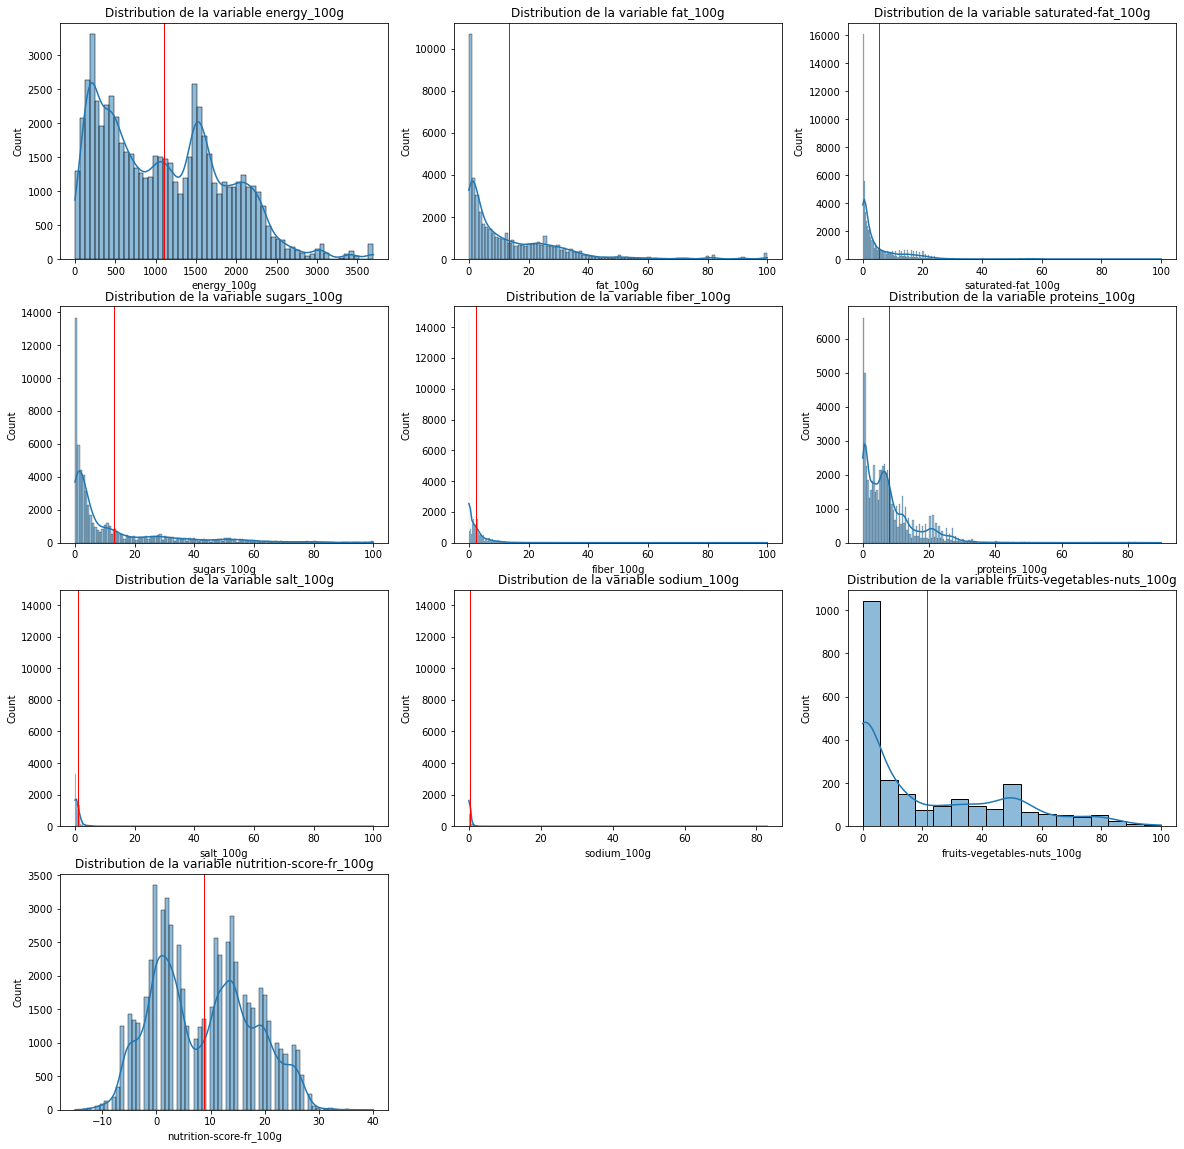

In [53]:
# distribution des variables numeriques

plt.figure(figsize = (20,20))
   
for i,variable in enumerate(var_num):
    ax = plt.subplot(4,3,i+1)
    sns.histplot(df2[variable],kde = True)
    xbar=np.mean(df2[variable])
    plt.axvline(xbar, color='r', linewidth=1)
    ax.set_title("Distribution de la variable " + variable)

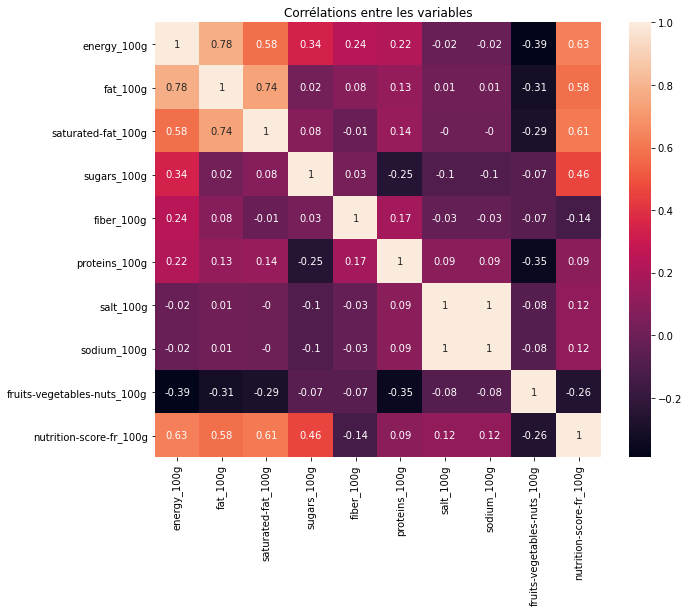

In [54]:
# corrélations des variables numériques

corr = df2.corr(method='pearson')
corr = corr.round(decimals=2)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True)
plt.title("Corrélations entre les variables", color= 'black')
plt.show()

In [55]:
df2.drop('sodium_100g', inplace=True, axis=1)

In [56]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97774 entries, 0 to 320770
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   code                         97774 non-null  object 
 1   product_name                 90592 non-null  object 
 2   generic_name                 37988 non-null  object 
 3   quantity                     70749 non-null  object 
 4   packaging                    58499 non-null  object 
 5   packaging_tags               58499 non-null  object 
 6   brands                       85764 non-null  object 
 7   categories                   61418 non-null  object 
 8   categories_tags              61418 non-null  object 
 9   categories_fr                61418 non-null  object 
 10  labels_fr                    34796 non-null  object 
 11  nutrition_grade_fr           60808 non-null  object 
 12  pnns_groups_1                64295 non-null  object 
 13  pnns_groups_2  

In [57]:
# lignes avec nom de produit absent

product_name_na = df2[df2.product_name.isna()]
display(product_name_na)

,code,product_name,generic_name,quantity,packaging,packaging_tags,brands,categories,categories_tags,categories_fr,...,image_small_url,energy_100g,fat_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,fruits-vegetables-nuts_100g,nutrition-score-fr_100g
48,0000000027205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,http://fr.openfoodfacts.org/images/products/00...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183,0000007020254,NaN,NaN,NaN,NaN,NaN,A&W,Root bier,fr:root-bier,Root-bier,...,http://fr.openfoodfacts.org/images/products/00...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187,0000009336247,NaN,Bonbons acidulés Raisin Fraise,"46,7 g",Carton,carton,NaN,Bonbons,"en:sugary-snacks,en:confectioneries,en:candies","Snacks sucrés,Confiseries,Bonbons",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,0000050157846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
280,00003001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320718,9688084817410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320745,9800801107,NaN,NaN,NaN,NaN,NaN,NaN,fr:Pâtes à tartiner aux noisettes et au cacao,"en:spreads,en:breakfasts,en:sweet-spreads,fr:p...","Produits à tartiner,Petit-déjeuners,Produits à...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320746,9800895007,NaN,NaN,NaN,NaN,NaN,NaN,fr:Pâtes à tartiner aux noisettes et au cacao,"en:spreads,en:breakfasts,en:sweet-spreads,fr:p...","Produits à tartiner,Petit-déjeuners,Produits à...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320747,9800895250,NaN,NaN,NaN,NaN,NaN,NaN,fr:Pâtes à tartiner aux noisettes et au cacao,"en:spreads,en:breakfasts,en:sweet-spreads,fr:p...","Produits à tartiner,Petit-déjeuners,Produits à...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
clean = df2.copy()

In [59]:
# supprimer les lignes avec des nom de produit absents

clean.drop(labels = product_name_na.index, inplace = True)
clean = clean.reset_index(drop=True)

In [60]:
# lignes avec toutes les données nutritionnelles absentes

all_na = clean[clean["energy_100g"].isna() 
                            & clean["proteins_100g"].isna()
                            & clean["sugars_100g"].isna()
                            & clean["fat_100g"].isna()
                            & clean["saturated-fat_100g"].isna()
                            & clean["salt_100g"].isna() 
                            & clean["nutrition-score-fr_100g"].isna() 
                            & clean["fruits-vegetables-nuts_100g"].isna()
                            & clean["fiber_100g"].isna()
            ]
print(f"Nombre d'observations ayant toutes les variables nutritionnelles absentes: {all_na.shape[0]}")
print(f"Dix premières observations ayant toutes les variables nutritionnelles absentes")
display(all_na.head(10))

Nombre d'observations ayant toutes les variables nutritionnelles absentes: 26224
Dix premières observations ayant toutes les variables nutritionnelles absentes


,code,product_name,generic_name,quantity,packaging,packaging_tags,brands,categories,categories_tags,categories_fr,...,image_small_url,energy_100g,fat_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,fruits-vegetables-nuts_100g,nutrition-score-fr_100g
0,0000000003087,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000024600,Filet de bœuf,NaN,2.46 kg,plastique,plastique,NaN,Filet de bœuf,fr:filet-de-boeuf,Filet-de-boeuf,...,http://fr.openfoodfacts.org/images/products/00...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000000039259,Twix x2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,http://fr.openfoodfacts.org/images/products/00...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0000005200016,lentilles vertes,NaN,1 kg,Sachet plastique,sachet-plastique,Bertrand Lejeune,"Aliments et boissons à base de végétaux,Alimen...","en:plant-based-foods-and-beverages,en:plant-ba...","Aliments et boissons à base de végétaux,Alimen...",...,http://fr.openfoodfacts.org/images/products/00...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0000007730009,Biscuits sablés fourrage au cacao,Biscuits sablés déclassés fourrage au cacao,1 kg,"Carton,boîte","carton,boite",St Michel,"Snacks sucrés,Biscuits et gâteaux,Biscuits,Sablés","en:sugary-snacks,en:biscuits-and-cakes,en:bisc...","Snacks sucrés,Biscuits et gâteaux,Biscuits,Sablés",...,http://fr.openfoodfacts.org/images/products/00...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0000010090206,Thé de Noël aromatisé orange-cannelle,NaN,75 g,aluminium,aluminium,Alice Délice,"Aliments et boissons à base de végétaux,Boisso...","en:plant-based-foods-and-beverages,en:beverage...","Aliments et boissons à base de végétaux,Boisso...",...,http://fr.openfoodfacts.org/images/products/00...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0000010127735,Sirops pour ganache macarons,NaN,4 x 5 cl,"Carton,Bouteille,Verre","carton,bouteille,verre",Alice Délice,"Sirops,Sirops pour ganache","en:syrups,fr:sirops-pour-ganache","Sirops,Sirops-pour-ganache",...,http://fr.openfoodfacts.org/images/products/00...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,0000020004552,Côte du Rhône village,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,0000030053014,Bonbon Vichy,NaN,19 g,emballage,emballage,NaN,NaN,NaN,NaN,...,http://fr.openfoodfacts.org/images/products/00...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,0000040144078,M&m's peanut butter,NaN,46.2gr,NaN,NaN,M&m's,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
# verification les lignes avec des données nutritionnelles absentes par code de produit

all_na.groupby('pnns_groups_2')['code'].count().sort_values()

pnns_groups_2
legumes                                1
Artificially sweetened beverages       5
fruits                                 7
Tripe dishes                          17
Fruit nectars                         21
Soups                                 33
Pizza pies and quiche                 34
Sandwich                              35
Dairy desserts                        50
Potatoes                              52
Ice cream                             63
Breakfast cereals                     64
Dried fruits                          67
Nuts                                  77
vegetables                            83
pastries                              86
Legumes                               87
Sweetened beverages                  139
Fruit juices                         141
Appetizers                           147
Bread                                168
Fats                                 169
Milk and yogurt                      172
Eggs                                 204
Ce

In [62]:
# supprimer les lignes avec les données nutritionnelles absentes

clean.drop(labels = all_na.index, inplace = True)

In [63]:
# taux de remplissage des variables après les traitements

taux_remplissage(clean)

,Nombre_valeurs_manquantes,Pourcentage_valeurs_manquantes
code,0,0.00
product_name,0,0.00
brands,266,0.41
energy_100g,1024,1.59
proteins_100g,1043,1.62
salt_100g,2771,4.30
sugars_100g,2870,4.46
saturated-fat_100g,2959,4.60
nutrition_grade_fr,3903,6.06
nutrition-score-fr_100g,3903,6.06


<AxesSubplot:>

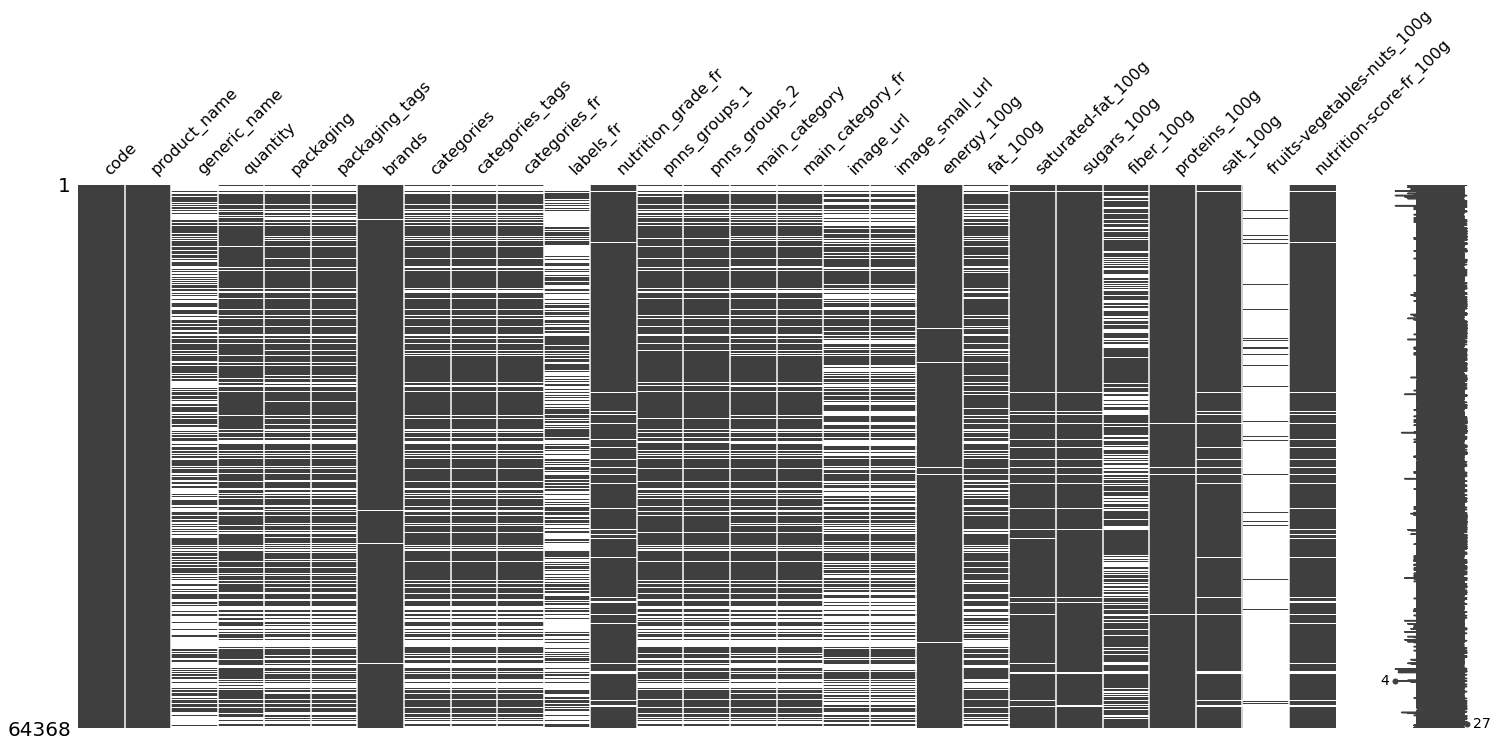

In [64]:
# visualisation du taux de remlissage

msno.matrix(clean)

In [65]:
# Remplacement des valeurs Nan par 0 pour toutes les valeurs manquantes de fruits-vegetables-nuts_100g

clean.loc[:,'fruits-vegetables-nuts_100g']=clean.loc[:,'fruits-vegetables-nuts_100g'].fillna(0)

In [66]:
# Remplacement des valeurs Nan par 0 pour toutes les valeurs manquantes de fiber_100g

clean.loc[:,'fiber_100g']=clean.loc[:,'fiber_100g'].fillna(0)

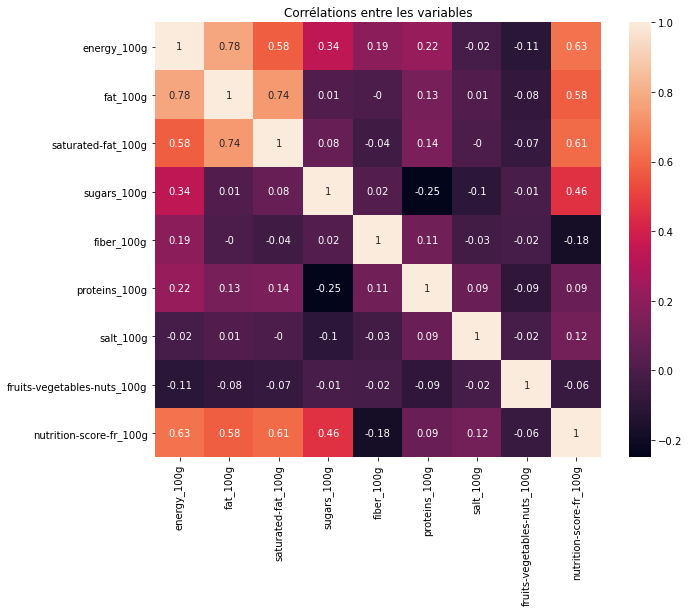

In [67]:
# matrice de correlation des variables numeriques

corr = clean.corr(method='pearson')
corr = corr.round(decimals=2)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True)
plt.title("Corrélations entre les variables", color= 'black')
plt.show()

In [68]:
# variables à completer par IterativeImputer

ndf = clean[['energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'sugars_100g','proteins_100g']]

In [70]:
# import des librairies

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

In [71]:
# Introduce IterativeImputer with an estimator

imp = IterativeImputer(estimator=RandomForestRegressor(),imputation_order='ascending')

# Fit to the dataset containing missing values

imp.fit(ndf)

# Transform the dataset containing missing values

df_input = pd.DataFrame(imp.transform(ndf), columns = ndf.columns)

C:\Users\mfila\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:700: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


<AxesSubplot:>

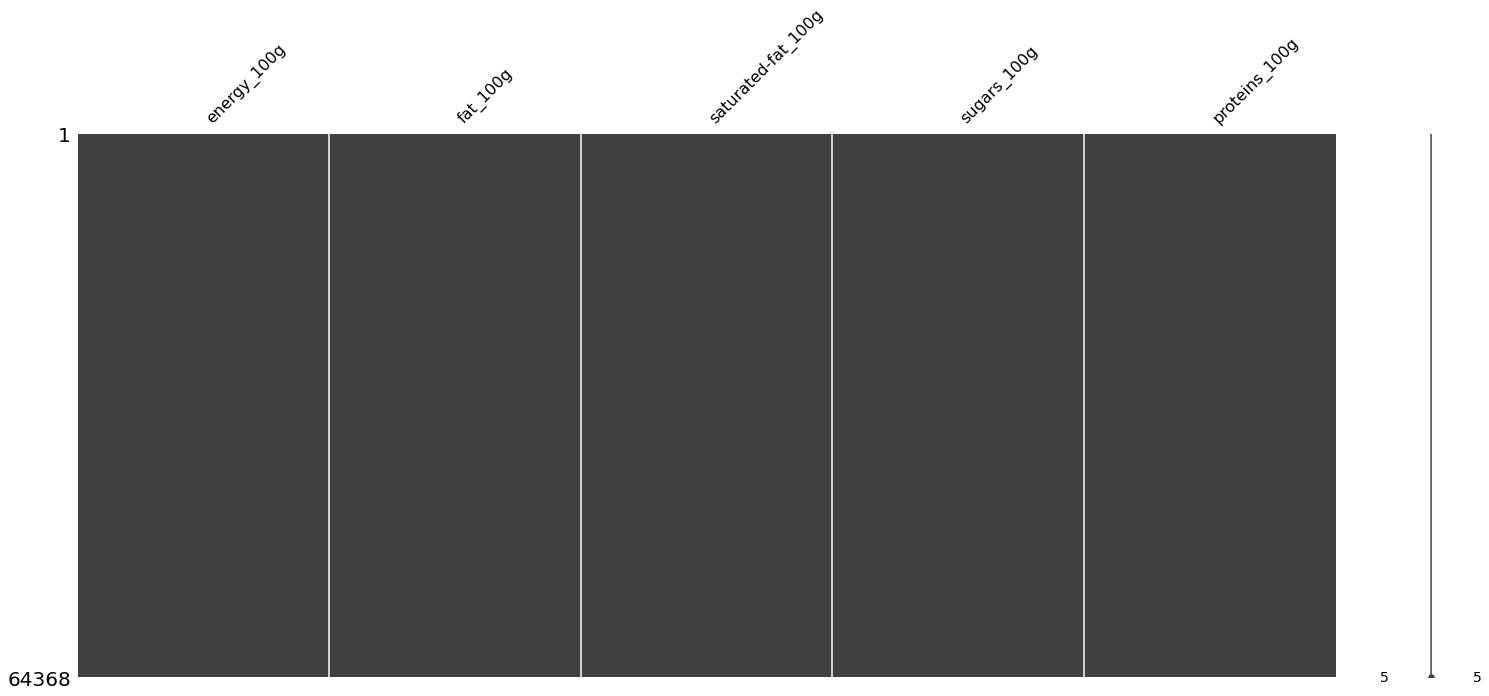

In [72]:
# verification du remplissage des variables après imputation

msno.matrix(df_input)

In [73]:
# verification des min et max apres imputation
df_input.describe()

,energy_100g,fat_100g,saturated-fat_100g,sugars_100g,proteins_100g
count,64368.000000,64368.000000,64368.000000,64368.000000,64368.000000
mean,1117.364144,13.471514,5.415357,13.087234,7.798167
std,768.844034,16.845270,8.320356,18.723815,7.718556
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,433.000000,1.400000,0.300000,1.000000,2.000000
50%,1047.000000,7.077967,2.000000,4.000000,6.000000
75%,1653.000000,21.000000,7.500000,17.000000,11.000000
max,3700.000000,100.000000,100.000000,100.000000,90.000000


C:\Users\mfila\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mfila\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



Traitement de la variable  energy_100g


C:\Users\mfila\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mfila\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



Traitement de la variable  fat_100g


C:\Users\mfila\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mfila\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



Traitement de la variable  saturated-fat_100g


C:\Users\mfila\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mfila\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



Traitement de la variable  proteins_100g


C:\Users\mfila\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mfila\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



Traitement de la variable  sugars_100g


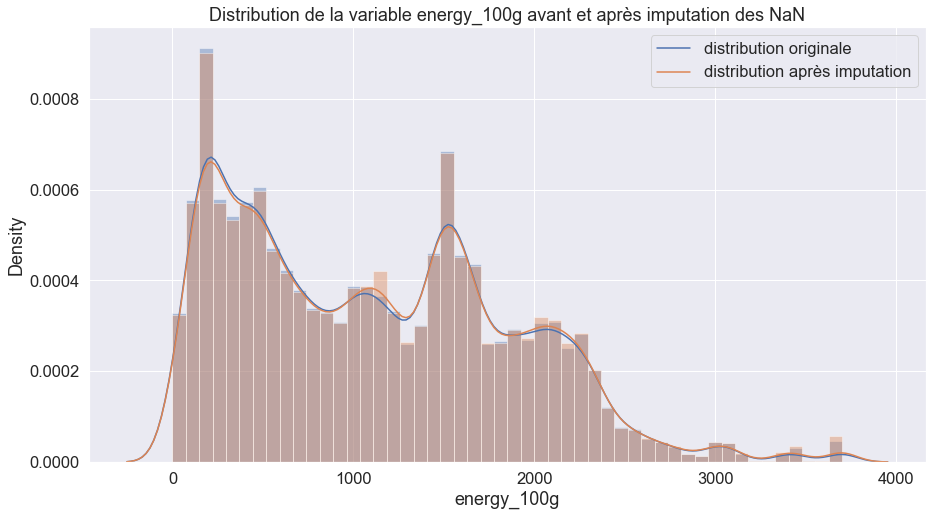

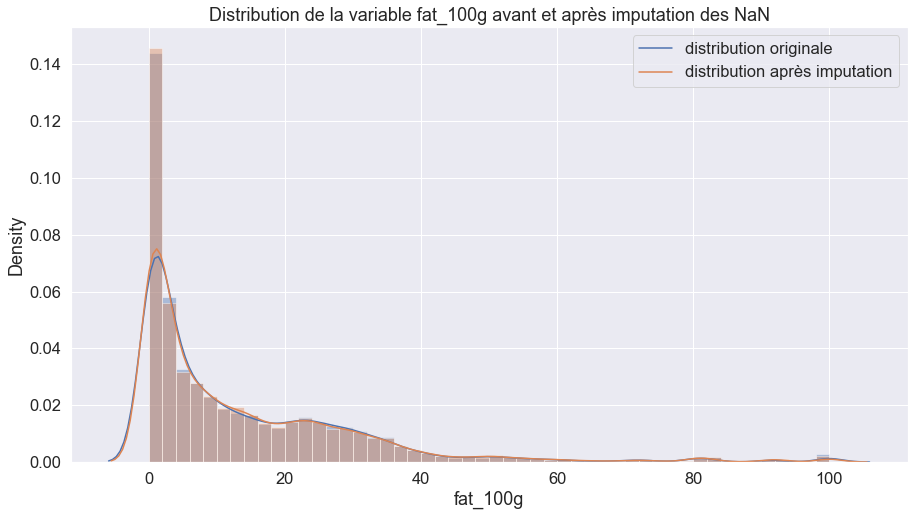

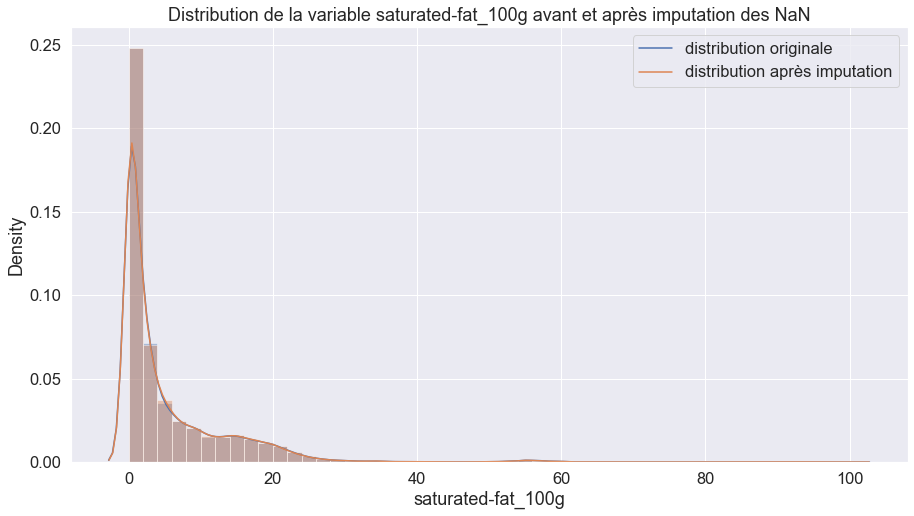

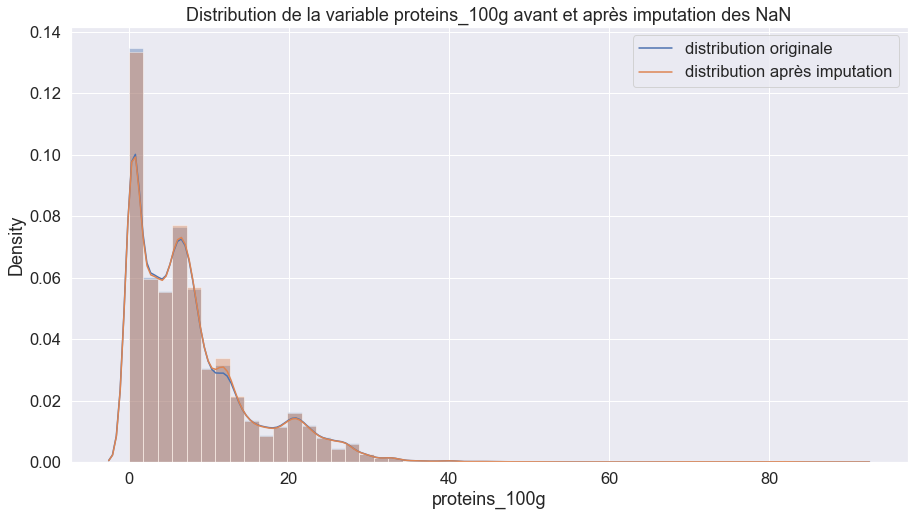

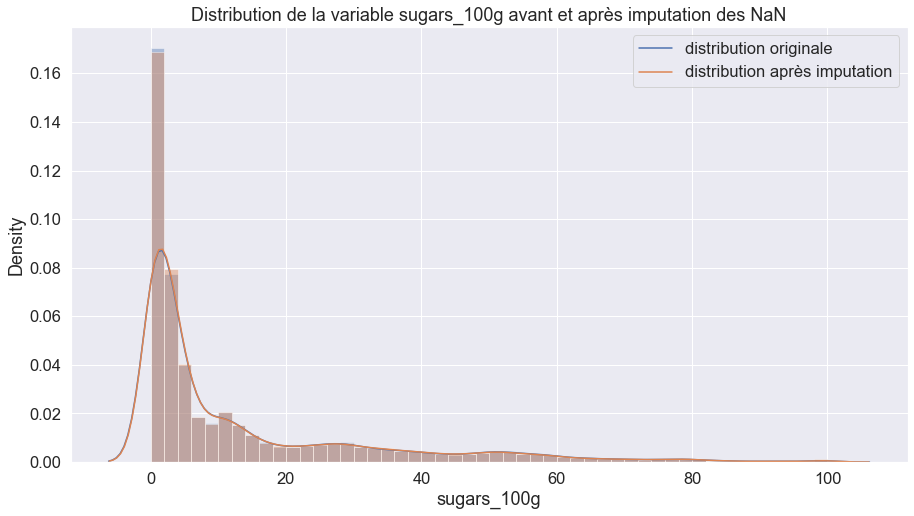

In [74]:
# distributions avant et après IterativeImputer

sns.set(font_scale=1.5)
for column in ['energy_100g', 'fat_100g', 'saturated-fat_100g','proteins_100g','sugars_100g']:
    plt.figure(figsize=(15,8))
    chaine = 'Distribution de la variable ' + column + ' avant et après imputation des NaN'
    plt.title(chaine)
    
    sns.distplot(ndf[column])
    sns.distplot(df_input[column])
    plt.legend(['distribution originale', 'distribution après imputation'])
    print('\nTraitement de la variable ',column)
sns.set(font_scale=1)


In [75]:
# ajoutons les colonnes completées à notre dataframe

In [76]:
clean2 = clean.copy()
columns_to_drop = ['energy_100g', 'fat_100g', 'saturated-fat_100g', 'proteins_100g' ,'sugars_100g']
clean2.drop(columns_to_drop, inplace=True, axis=1)

In [77]:
# verification des dimensions avant concat

clean2.shape

(64368, 22)

In [78]:
# verification des dimensions avant concat

df_input.shape

(64368, 5)

In [79]:
clean3= clean2.copy()

In [80]:
clean3 = clean3.reset_index(drop=True)

In [81]:
clean3 = pd.concat([clean3,df_input],axis=1)

<AxesSubplot:>

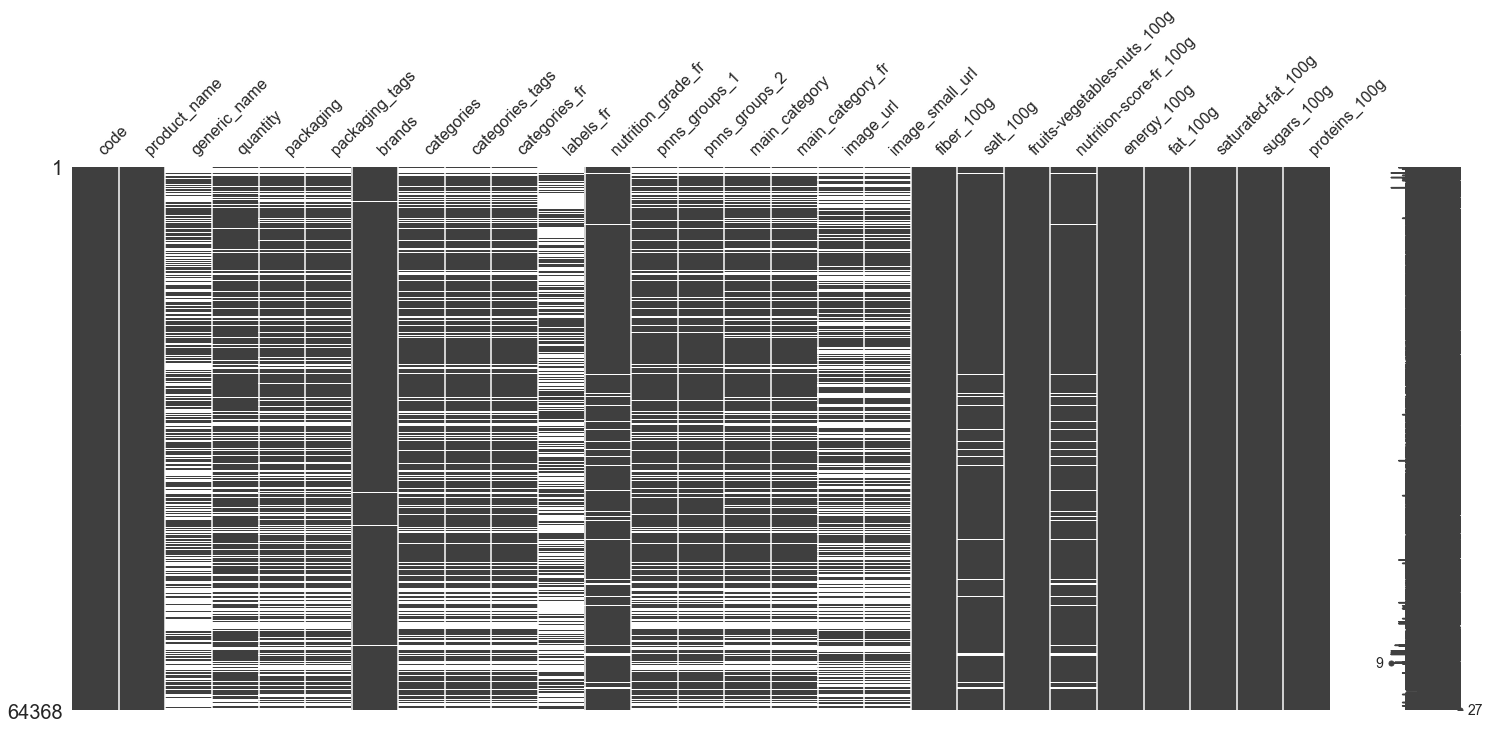

In [82]:
# visualisation de taux de remplissage de nouveau df
msno.matrix(clean3)

In [84]:
# variables represantant les categorie de produit 

df_var_categorie = clean3[['product_name', 'categories', 'categories_tags', 
                               'categories_fr', 'pnns_groups_1','pnns_groups_2', 'main_category', 'main_category_fr']]

In [85]:
# taux de remplissage des variables categorie de produit

taux_remplissage(df_var_categorie)

,Nombre_valeurs_manquantes,Pourcentage_valeurs_manquantes
product_name,0,0.00
pnns_groups_2,14037,21.81
pnns_groups_1,14174,22.02
categories,16697,25.94
categories_tags,16697,25.94
categories_fr,16697,25.94
main_category,16697,25.94
main_category_fr,16697,25.94


In [87]:
# nombre de valeurs uniques, variable categorie_fr

df_var_categorie.categories_fr.nunique()

12490

In [88]:
# nombre de valeurs uniques, variable categories

df_var_categorie.categories.nunique()

21020

In [89]:
# nombre de valeurs uniques, variable main_category

df_var_categorie.main_category.nunique()

1115

In [90]:
# nombre de valeurs uniques, variable main_category_fr

df_var_categorie.main_category_fr.nunique()

1115

In [91]:
# nombre de valeurs uniques, variable pnns_groups_1

df_var_categorie.pnns_groups_2.nunique()

40

In [92]:
# nombre de valeurs uniques, variable pnns_groups_2

df_var_categorie.pnns_groups_1.nunique()

13

In [95]:
# valeurs uniques, variable pnns_groups_1

df_var_categorie.pnns_groups_1.value_counts()

unknown                    7592
Sugary snacks              7464
Milk and dairy products    5801
Cereals and potatoes       5446
Composite foods            5401
Fish Meat Eggs             5036
Beverages                  4767
Fat and sauces             3075
Fruits and vegetables      2888
Salty snacks               1884
fruits-and-vegetables       454
sugary-snacks               385
cereals-and-potatoes          1
Name: pnns_groups_1, dtype: int64

In [96]:
# valeurs uniques, variable pnns_groups_2

df_var_categorie.pnns_groups_2.value_counts()

unknown                             7592
One-dish meals                      4380
Biscuits and cakes                  3340
Cereals                             2753
Cheese                              2700
Processed meat                      2275
Sweets                              2274
Dressings and sauces                2065
Milk and yogurt                     1882
Chocolate products                  1850
Fish and seafood                    1728
Sweetened beverages                 1508
Appetizers                          1475
Non-sugared beverages               1427
Fruit juices                        1337
Vegetables                          1256
Bread                               1143
Breakfast cereals                   1048
Fats                                1010
Fruits                               945
Meat                                 919
Dairy desserts                       693
Sandwich                             604
Ice cream                            526
Legumes         

In [97]:
df_pnns_clean = df_var_categorie.copy()

In [98]:
# correction des modalités d'ecriture pour la variable pnns_groups_2, remplacer les '-' par ' '

df_pnns_clean["pnns_groups_2"] = df_pnns_clean["pnns_groups_2"].str.lower().str.replace('-', ' ')

In [101]:
# verification des modalités d'ecriture pour chercher les categories qui peuvent être regroupées

df_pnns_clean.pnns_groups_2.value_counts()

unknown                             7592
one dish meals                      4380
biscuits and cakes                  3340
cereals                             2754
cheese                              2700
processed meat                      2275
sweets                              2274
dressings and sauces                2065
milk and yogurt                     1882
chocolate products                  1850
fish and seafood                    1728
vegetables                          1694
sweetened beverages                 1508
appetizers                          1475
non sugared beverages               1427
fruit juices                        1337
bread                               1143
breakfast cereals                   1048
fats                                1010
fruits                               961
meat                                 919
dairy desserts                       693
sandwich                             604
ice cream                            526
legumes         

In [102]:
# regroupement des categories vegetables et legumes

df_pnns_clean.loc[df_pnns_clean["pnns_groups_2"]=='legumes']='vegetables'

In [103]:
df_pnns_clean.pnns_groups_2.value_counts()

unknown                             7592
one dish meals                      4380
biscuits and cakes                  3340
cereals                             2754
cheese                              2700
processed meat                      2275
sweets                              2274
vegetables                          2145
dressings and sauces                2065
milk and yogurt                     1882
chocolate products                  1850
fish and seafood                    1728
sweetened beverages                 1508
appetizers                          1475
non sugared beverages               1427
fruit juices                        1337
bread                               1143
breakfast cereals                   1048
fats                                1010
fruits                               961
meat                                 919
dairy desserts                       693
sandwich                             604
ice cream                            526
pizza pies and q

In [106]:
# remplacer les unknown par other

df_pnns_clean.loc[df_pnns_clean["pnns_groups_2"]=='unknown'] = "other"

In [116]:
# remplacer les Nan par other

df_pnns_clean.loc[df_pnns_clean["pnns_groups_2"].isna() == True] = "other"

In [118]:
# verification des modalités après remplacement

df_pnns_clean.pnns_groups_2.value_counts()

other                               21629
one dish meals                       4380
biscuits and cakes                   3340
cereals                              2754
cheese                               2700
processed meat                       2275
sweets                               2274
vegetables                           2145
dressings and sauces                 2065
milk and yogurt                      1882
chocolate products                   1850
fish and seafood                     1728
sweetened beverages                  1508
appetizers                           1475
non sugared beverages                1427
fruit juices                         1337
bread                                1143
breakfast cereals                    1048
fats                                 1010
fruits                                961
meat                                  919
dairy desserts                        693
sandwich                              604
ice cream                         

In [125]:
clean4 = clean3.copy()

In [126]:
clean4 = clean4[['code', 'product_name', 'brands','labels_fr', 'nutrition_grade_fr',
       'fiber_100g', 'salt_100g',
       'fruits-vegetables-nuts_100g', 'nutrition-score-fr_100g', 'energy_100g',
       'fat_100g', 'saturated-fat_100g', 'sugars_100g', 'proteins_100g']]

In [127]:
# creation d'une nouvelle colonne avec la categorie de produit nettoyée

clean4['product_category'] = df_pnns_clean.pnns_groups_2

In [128]:
clean4.head(5)

,code,product_name,brands,labels_fr,nutrition_grade_fr,fiber_100g,salt_100g,fruits-vegetables-nuts_100g,nutrition-score-fr_100g,energy_100g,fat_100g,saturated-fat_100g,sugars_100g,proteins_100g,product_category
0,0000000036252,Lion Peanut x2,Sunridge,NaN,e,2.5,0.09652,0.0,22.0,1883.0,20.0000,12.5000,57.5000,2.50,other
1,0000000039529,Pack de 2 Twix,"Twix, Lundberg",NaN,NaN,6.2,NaN,0.0,NaN,1481.0,4.1700,0.7658,31.5651,6.25,other
2,0000010187319,Mini Confettis,Alice Délice,NaN,d,0.9,0.01000,0.0,14.0,1753.0,5.1523,0.8000,87.7000,0.60,other
3,0000010207260,Praliné Amande Et Noisette,Alice Délice,NaN,d,3.9,0.00300,0.0,14.0,2406.0,35.2117,2.9000,50.3000,9.50,other
4,0000040608754,"Pepsi, Nouveau goût !",Pepsi,NaN,e,0.0,0.02540,0.0,13.0,177.0,0.0000,0.0000,10.4000,0.00,sweetened beverages


In [129]:
# verification de remplissage après le nettoyage de categorie

taux_remplissage(clean4)

,Nombre_valeurs_manquantes,Pourcentage_valeurs_manquantes
code,0,0.00
product_name,0,0.00
fiber_100g,0,0.00
fruits-vegetables-nuts_100g,0,0.00
energy_100g,0,0.00
fat_100g,0,0.00
saturated-fat_100g,0,0.00
sugars_100g,0,0.00
proteins_100g,0,0.00
product_category,0,0.00


<AxesSubplot:xlabel='salt_100g', ylabel='Count'>

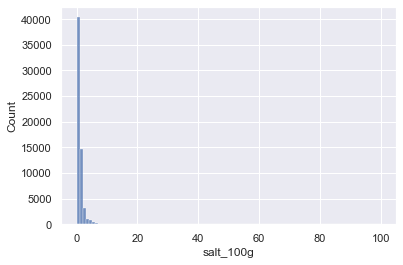

In [133]:
# distribution de la variable salt_100g

sns.histplot(clean4['salt_100g'],bins=100)

In [134]:
clean5 = clean4.copy()

In [135]:
# remplacer les valeurs absentes salt_100g par mediane de groupe de produit

clean5['salt_100g'] = clean5['salt_100g'].fillna(round(clean5.groupby('product_category')['salt_100g'].transform('median'),2))

In [136]:
taux_remplissage(clean5)

,Nombre_valeurs_manquantes,Pourcentage_valeurs_manquantes
code,0,0.00
product_name,0,0.00
fiber_100g,0,0.00
salt_100g,0,0.00
fruits-vegetables-nuts_100g,0,0.00
energy_100g,0,0.00
fat_100g,0,0.00
saturated-fat_100g,0,0.00
sugars_100g,0,0.00
proteins_100g,0,0.00


In [203]:
# Supprimer 266 lignes avec les brands absents

clean5.dropna(subset=['brands'],inplace=True)

In [204]:
taux_remplissage(clean5)

,Nombre_valeurs_manquantes,Pourcentage_valeurs_manquantes
code,0,0.00
product_name,0,0.00
brands,0,0.00
fiber_100g,0,0.00
salt_100g,0,0.00
fruits-vegetables-nuts_100g,0,0.00
energy_100g,0,0.00
fat_100g,0,0.00
saturated-fat_100g,0,0.00
sugars_100g,0,0.00


In [ ]:
Nettoyage de la colonne labels_fr

In [205]:
# regardons les modalités de la colonne labels_fr

clean5.labels_fr.value_counts().head(50)

Bio,Bio européen,AB Agriculture Biologique                           4783
Point Vert                                                           1752
Point Vert,Eco-emballages                                             727
Bio,Bio européen,FR-BIO-01,AB Agriculture Biologique                  686
Labels de distributeurs,Sélection Intermarché                         367
Sans colorants,Sans conservateurs                                     341
Sans conservateurs                                                    328
AOP                                                                   308
Produit en Bretagne                                                   301
Viande Française,Viande Porcine Française                             235
Sans gluten                                                           231
Sans huile de palme                                                   226
Labels de distributeurs,Qualité Carrefour                             223
Peu ou pas de sucre,Sans sucre ajouté 

In [238]:
clean6 = clean5.copy()

In [239]:
# correction des modalités d'ecriture, remplacer les '-' par ' '

clean6["labels_fr"] = clean6["labels_fr"].str.lower().str.replace('-', ' ')

In [240]:
# nombre de modalités uniques pour la colonne labels_fr

clean6.labels_fr.nunique()

8352

In [241]:
# creation d'une colonne avec label bio

In [242]:
labels_clean = clean6.labels_fr.value_counts()

In [243]:
labels_clean

bio,bio européen,ab agriculture biologique                                                                                                                       4783
point vert                                                                                                                                                       1752
point vert,eco emballages                                                                                                                                         727
bio,bio européen,fr bio 01,ab agriculture biologique                                                                                                              686
labels de distributeurs,sélection intermarché                                                                                                                     367
                                                                                                                                                                 ... 
sour

In [244]:
clean6['label_bio'] = clean6['labels_fr']

In [245]:
# creation d'une liste aves les modalités d'ecriture du label bio

list_bio = ["bio", "BIO", "Bio", "AB", 'ab', 'agriculture biologique', 'Agriculture biologique', 'organic', 'org']

In [246]:
# création d'une colonne label_bio avec la varaible de type bool

clean6.loc[(clean6['label_bio'].str.contains("|".join(list_bio)) == False), 'label_bio'] = False

In [247]:
clean6.loc[(clean6['label_bio'].str.contains("|".join(list_bio)) == True), 'label_bio'] = True

In [248]:
# Remplacement des valeurs Nan par False, car par defaut nous considerons que si l'information sur le label est non connue, 
# le produit n'est pas labelisé

clean6.label_bio= clean6.label_bio.fillna(False)

In [249]:
# même demarche pour le label viande française, creation d'une colonne avec label viande_fr

clean6['label_viande_fr'] = clean6['labels_fr']
list_viande_fr = ['viande française', 'viandes françaises']
clean6.loc[(clean6['label_viande_fr'].str.contains("|".join(list_viande_fr)) == False), 'label_viande_fr'] = False
clean6.loc[(clean6['label_viande_fr'].str.contains("|".join(list_viande_fr)) == True), 'label_viande_fr'] = True
clean6.label_viande_fr= clean6.label_viande_fr.fillna(False)

In [250]:
# creation d'une colonne avec label aop

clean6['label_aop'] = clean6['labels_fr']
list_aop = ['aop']
clean6.loc[(clean6['label_aop'].str.contains("|".join(list_aop)) == False), 'label_aop'] = False
clean6.loc[(clean6['label_aop'].str.contains("|".join(list_aop)) == True), 'label_aop'] = True
clean6.label_aop= clean6.label_aop.fillna(False)

In [251]:
# creation d'une colonne avec label sans conservateur

clean6['label_sans_conservateur'] = clean6['labels_fr']
list_cons = ['sans conservateur', 'sans conservateurs']
clean6.loc[(clean6['label_sans_conservateur'].str.contains("|".join(list_cons)) == False), 'label_sans_conservateur'] = False
clean6.loc[(clean6['label_sans_conservateur'].str.contains("|".join(list_cons)) == True), 'label_sans_conservateur'] = True
clean6.label_sans_conservateur= clean6.label_sans_conservateur.fillna(False)

In [252]:
# creation d'une colonne avec label sans gluten

clean6['label_sans_gluten'] = clean6['labels_fr']
list_gluten = ['sans gluten', 'gluten free']
clean6.loc[(clean6['label_sans_gluten'].str.contains("|".join(list_gluten)) == False), 'label_sans_gluten'] = False
clean6.loc[(clean6['label_sans_gluten'].str.contains("|".join(list_gluten)) == True), 'label_sans_gluten'] = True
clean6.label_sans_gluten= clean6.label_sans_gluten.fillna(False)

In [253]:
# creation d'une colonne avec label fabriqué en france

clean6['label_fr'] = clean6['labels_fr']
list_fr = ['fabriqué en france', 'produit en bretagne', 'lait_français']
clean6.loc[(clean6['label_fr'].str.contains("|".join(list_fr)) == False), 'label_fr'] = False
clean6.loc[(clean6['label_fr'].str.contains("|".join(list_fr)) == True), 'label_fr'] = True
clean6.label_fr= clean6.label_fr.fillna(False)

In [254]:
# supprimer les colonnes inutiles

col_drop = ['labels_fr']
clean6.drop(col_drop, inplace=True, axis=1)

In [270]:
clean6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64102 entries, 0 to 64367
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   code                         64102 non-null  object 
 1   product_name                 64102 non-null  object 
 2   brands                       64102 non-null  object 
 3   nutrition_grade_fr           60255 non-null  object 
 4   fiber_100g                   64102 non-null  float64
 5   salt_100g                    64102 non-null  float64
 6   fruits-vegetables-nuts_100g  64102 non-null  float64
 7   nutrition-score-fr_100g      60255 non-null  float64
 8   energy_100g                  64102 non-null  float64
 9   fat_100g                     64102 non-null  float64
 10  saturated-fat_100g           64102 non-null  float64
 11  sugars_100g                  64102 non-null  float64
 12  proteins_100g                64102 non-null  float64
 13  product_category

In [255]:
taux_remplissage(clean6)

,Nombre_valeurs_manquantes,Pourcentage_valeurs_manquantes
code,0,0.0
label_sans_conservateur,0,0.0
label_aop,0,0.0
label_viande_fr,0,0.0
label_bio,0,0.0
product_category,0,0.0
proteins_100g,0,0.0
sugars_100g,0,0.0
saturated-fat_100g,0,0.0
fat_100g,0,0.0


In [259]:
# jeu de données nettoyé sans valeurs absentes

food_data_clean = clean6.loc[(clean6['nutrition-score-fr_100g'].isna() == False)]

In [260]:
food_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60255 entries, 0 to 64367
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   code                         60255 non-null  object 
 1   product_name                 60255 non-null  object 
 2   brands                       60255 non-null  object 
 3   nutrition_grade_fr           60255 non-null  object 
 4   fiber_100g                   60255 non-null  float64
 5   salt_100g                    60255 non-null  float64
 6   fruits-vegetables-nuts_100g  60255 non-null  float64
 7   nutrition-score-fr_100g      60255 non-null  float64
 8   energy_100g                  60255 non-null  float64
 9   fat_100g                     60255 non-null  float64
 10  saturated-fat_100g           60255 non-null  float64
 11  sugars_100g                  60255 non-null  float64
 12  proteins_100g                60255 non-null  float64
 13  product_category

In [261]:
# jeu de données avec les valeurs de nutriscore et nutrigrade à predire

food_data_pred = clean6.loc[(clean6['nutrition-score-fr_100g'].isna() == True)]

In [264]:
food_data_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3847 entries, 1 to 64348
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   code                         3847 non-null   object 
 1   product_name                 3847 non-null   object 
 2   brands                       3847 non-null   object 
 3   nutrition_grade_fr           0 non-null      object 
 4   fiber_100g                   3847 non-null   float64
 5   salt_100g                    3847 non-null   float64
 6   fruits-vegetables-nuts_100g  3847 non-null   float64
 7   nutrition-score-fr_100g      0 non-null      float64
 8   energy_100g                  3847 non-null   float64
 9   fat_100g                     3847 non-null   float64
 10  saturated-fat_100g           3847 non-null   float64
 11  sugars_100g                  3847 non-null   float64
 12  proteins_100g                3847 non-null   float64
 13  product_category 

In [268]:
# Exportation du jeu de données 1 (sans valeurs absentes)

food_data_clean.to_csv("food_data_clean.csv",header=True,index=False)

In [269]:
# Exportation du jeu de données 2 (nutriscore et nutrigrade à predire)

food_data_pred.to_csv("food_data_pred.csv",header=True,index=False)